In [4]:
import os, gzip, numpy
import pickle
from timeit import default_timer as timer

import matplotlib.pylab as plt
import matplotlib.image as mpimg
import cv2

import numpy as np
from scipy import stats

base_dir = os.getcwd()
path_to_file = os.path.join(base_dir, 'mnist.pkl.gz')
print(path_to_file)
f = gzip.open(path_to_file, 'rb')
train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
f.close()

/Users/wei/Documents/classes/ANLY590/anly590/mnist.pkl.gz


In [12]:
len(test_set)
print('''
         The total number of training examples is: {training_length}.
         The total number of validation examples is: {val_length}.
         The total number of test examples is: {test_length}.
         '''.format(training_length = train_set[0].shape,
                    val_length = valid_set[0].shape,
                    test_length = test_set[0].shape))
print('The first 10 classes of the training set are: {}'.format(train_set[1][0:10]))


         The total number of training examples is: (50000, 784).
         The total number of validation examples is: (10000, 784).
         The total number of test examples is: (10000, 784).
         
The first 10 classes of the training set are: [5 0 4 1 9 2 1 3 1 4]


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def a(x, w, b):
    a_out = x.dot(w) + b
    return a_out

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def logistic(x, w, b):
    s = sigmoid(a(x, w, b))
    y = np.round(s)
    return np.array([y, s]).T

In [14]:
n_dims = 2
n_hidden_units = 3

w_11, w_12, w_13, w_21, w_22, w_23 = np.random.random(n_dims * n_hidden_units)
v_1, v_2, v_3 = np.random.random(n_hidden_units)
b_11,b_12,b_13 = np.random.random(n_hidden_units)
b_1 = np.array([b_11, b_12, b_13])
b_2 = np.random.random(1)

w_1 = np.array([w_11, w_12, w_13])
w_2 = np.array([w_21, w_22, w_23])

w = np.array([w_1, w_2])
v = np.array([v_1, v_2, v_3])
w

array([[0.95000997, 0.15440764, 0.28399828],
       [0.67499964, 0.96689405, 0.91465221]])

In [26]:
num_samples=50
x = np.random.uniform(low=(-5.0), high=5.0, size=2*num_samples).reshape(num_samples,2)

In [27]:
def feedforward_network_v1(x, w, v, b_1, b_2, activation=sigmoid):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    # Setting up our output y
    num_rows,num_columns = x.shape
    y = np.zeros((num_rows))
    
    for i in range(num_rows):
        x_i = x[i,:]
        
        # Linear activations into hidden units
        a1 = x_i[0]*w[0,0] + x_i[1]*w[1,0] + b_1[0]
        a2 = x_i[0]*w[0,1] + x_i[1]*w[1,1] + b_1[1]
        a3 = x_i[0]*w[0,2] + x_i[1]*w[1,2] + b_1[2]
        
        # output of hidden units
        h_1 = activation(a1)
        h_2 = activation(a2)
        h_3 = activation(a3)
        h = np.array([h_1,h_2,h_3])
        
        # Output of network
        y[i] = sigmoid(h_1*v[0] + h_2*v[1] + h_3*v[2] + b_2)
    
    return np.array(y)

In [28]:
feedforward_network_v1(x[:5,:], w, v, b_1, b_2)

array([0.57407614, 0.56615203, 0.6822997 , 0.58327825, 0.74856981])

In [29]:
def feedforward_network_v2(x, w, v, b_1, b_2, activation=sigmoid):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    # Setting up our output y
    l,_ = x.shape
    y = np.zeros((l))
    
    for i in range(l):
        x_i = x[i,:]
        # Setting up the hidden units
        h_1 = activation(a(x[i,:],w[:,0],b_1[0]))
        h_2 = activation(a(x[i,:],w[:,1],b_1[1]))
        h_3 = activation(a(x[i,:],w[:,2],b_1[2]))
        h = np.array([h_1,h_2,h_3])
        # Calculating the output
        y[i] = sigmoid(a(h,v,b_2))
    
    return np.array(y)

In [30]:
feedforward_network_v2(x[:5,:], w, v, b_1, b_2)

array([0.57407614, 0.56615203, 0.6822997 , 0.58327825, 0.74856981])

In [33]:
def feedforward_network_v3(x, w, v, b_1, b_2, activation=sigmoid):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    
    a = np.dot(x,w) + b_1
    h = activation(a)
    y = sigmoid(np.dot(h,v) + b_2)

    return np.array(y)

In [34]:
feedforward_network_v3(x[:5,:], w, v, b_1, b_2)

array([0.57407614, 0.56615203, 0.6822997 , 0.58327825, 0.74856981])

In [43]:
def randomize_weights(num_hidden_nodes, input_dim=1, wt_scale=1):
    w = wt_scale*np.random.randn(num_hidden_nodes*input_dim).reshape((input_dim, num_hidden_nodes))
    v = wt_scale*np.random.randn(num_hidden_nodes)
    h_bias = wt_scale*np.random.randn(num_hidden_nodes)
    y_bias = wt_scale*np.random.randn(1) 
    return (w, v, h_bias, y_bias)

(0, 1)

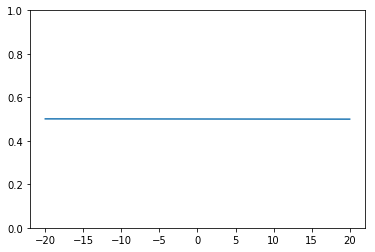

In [48]:
x=np.expand_dims(np.linspace(-20,20,250), 1)
x
z = randomize_weights(3,wt_scale=0.1)
y_pred = feedforward_network_v3(x, *z)
plt.plot(x, y_pred)
plt.ylim((0,1))